In [1]:
import uproot

In [2]:
import matplotlib.pyplot as plt

In [3]:
import awkward as ak

In [4]:
import vector #allows you to read the locations of particles

In [5]:
file = uproot.open("../ffNtuple_2Mu2E_100_1p2_48.root")

In [6]:
file.keys()

['ffNtuplizer;1',
 'ffNtuplizer/ffNtuple;7',
 'ffNtuplizer/ffNtuple;6',
 'ffNtupleStat;1',
 'ffNtupleStat/history;1',
 'ffNtupleStat/pileup;1',
 'ffNtupleStat/trigger;1',
 'ffNtupleStat/runlumi;1',
 'ffNtupleStat/weight;1']

In [7]:
file['ffNtuplizer/ffNtuple']

<TTree 'ffNtuple' (318 branches) at 0x7f76508799a0>

In [8]:
tree = file['ffNtuplizer/ffNtuple'] #Makes the data into readable tables of information, organized into branches

In [9]:
tree.keys() #This lists the content, but takes forever to run so I commented it out. This gives you the names of the branches.

['run',
 'event',
 'lumi',
 'fixedGridRho',
 'puInteractionNum',
 'trueInteractionNum',
 'weight',
 'weightProduct',
 'pv_n',
 'pv_rho',
 'pv_z',
 'pv_isFake',
 'pv_ndof',
 'pv_normChi2',
 'gen_n',
 'gen_charge',
 'gen_pid',
 'gen_daupid',
 'gen_p4',
 'gen_p4/gen_p4.fCoordinates.fX',
 'gen_p4/gen_p4.fCoordinates.fY',
 'gen_p4/gen_p4.fCoordinates.fZ',
 'gen_p4/gen_p4.fCoordinates.fT',
 'gen_vtx',
 'gen_vtx/gen_vtx.fCoordinates.fX',
 'gen_vtx/gen_vtx.fCoordinates.fY',
 'gen_vtx/gen_vtx.fCoordinates.fZ',
 'gen_dauvtx',
 'gen_dauvtx/gen_dauvtx.fCoordinates.fX',
 'gen_dauvtx/gen_dauvtx.fCoordinates.fY',
 'gen_dauvtx/gen_dauvtx.fCoordinates.fZ',
 'gen_daudr',
 'gen_posx',
 'gen_posy',
 'gen_posz',
 'gen_dauposdr',
 'gen_dauposdz',
 'gen_dauposdphi',
 'genjet_n',
 'genjet_p4',
 'genjet_p4/genjet_p4.fCoordinates.fX',
 'genjet_p4/genjet_p4.fCoordinates.fY',
 'genjet_p4/genjet_p4.fCoordinates.fZ',
 'genjet_p4/genjet_p4.fCoordinates.fT',
 'genmet',
 'genmet/fCoordinates',
 'genmet/fCoordinates/fC

In [10]:
branches = tree.arrays() #The branches are the columns of the table

In [11]:
branches['muon_n']

<Array [2, 6, 6, 2, 5, 2, ... 9, 5, 5, 10, 6] type='29354 * uint32'>

In [12]:
branches['photon_n']

<Array [2, 0, 1, 1, 3, 1, ... 2, 2, 2, 2, 1, 2] type='29354 * uint32'>

In [13]:
branches['dsamuon_n']

<Array [1, 3, 3, 1, 2, 1, ... 2, 4, 1, 1, 7, 2] type='29354 * uint32'>

In [14]:
branches['electron_n']

<Array [1, 0, 1, 0, 2, 0, ... 0, 1, 0, 0, 0, 0] type='29354 * uint32'>

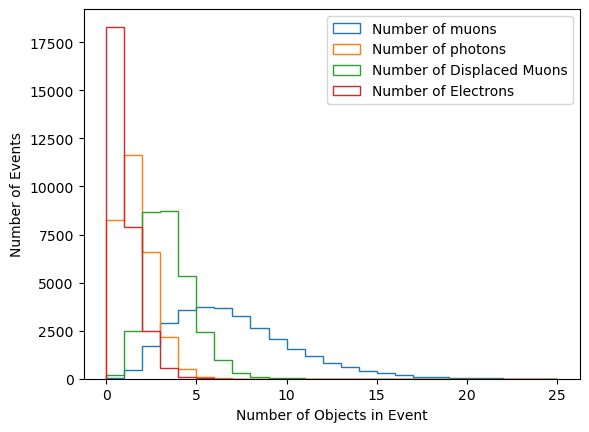

In [15]:
plt.hist(branches['muon_n'], bins=25, range=(0, 25), histtype='step',label="Number of muons")
plt.hist(branches['photon_n'], bins=25, range=(0, 25), histtype='step',label="Number of photons")
plt.hist(branches['dsamuon_n'], bins=25, range=(0, 25), histtype='step',label="Number of Displaced Muons")
plt.hist(branches['electron_n'], bins=25, range=(0, 25), histtype='step',label="Number of Electrons")
plt.xlabel("Number of Objects in Event")
plt.ylabel("Number of Events")
plt.legend()
plt.show()

In [16]:
electron_p4 = vector.zip({"px": branches['electron_p4.fCoordinates.fX'], #Vector allows you to operate with 2D,3D,4D vectors. vector.zip allows you to get the four-momenta of the electrons
                      "py": branches['electron_p4.fCoordinates.fY'], 
                      "pz": branches['electron_p4.fCoordinates.fZ'], 
                      "t": branches['electron_p4.fCoordinates.fT']})
#Have to compile into a vector to be able to plot position in space. 

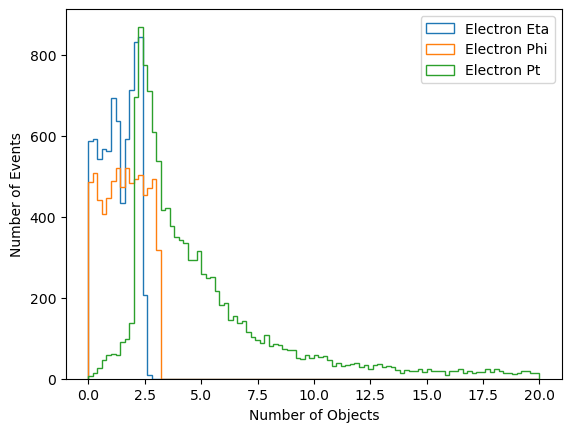

In [17]:
plt.hist(ak.flatten(electron_p4.eta), bins=100, range=(0,20), histtype='step',label="Electron Eta")
plt.hist(ak.flatten(electron_p4.phi), bins=100, range=(0,20), histtype='step',label="Electron Phi")
plt.hist(ak.flatten(electron_p4.pt),  bins=100, range=(0,20), histtype='step',label="Electron Pt")
plt.legend()
plt.xlabel("Number of Objects")
plt.ylabel("Number of Events")
plt.show()
#Plot .pt .eta (pseduorepidity) .phi,
#ak.flatten is used on the branches for jagged arrays, allows them to be readable and plottable.

In [18]:
muon_p4 = vector.zip({"px": branches['muon_p4.fCoordinates.fX'], 
                      "py": branches['muon_p4.fCoordinates.fY'], 
                      "pz": branches['muon_p4.fCoordinates.fZ'], 
                      "t": branches['muon_p4.fCoordinates.fT']})
print(muon_p4.x) #shows that its a jagged array, 2 muons in first event etc.
print(muon_p4)

[[0.939, -177], [-11.2, -1.11, -1.48, ... 30.7, 3.29, -0.366, -0.703, 0.949, -0.995]]
[[{x: 0.939, y: 0.0632, z: 3.23, t: 3.36}, ... y: 0.359, z: 5.01, t: 5.12}]]


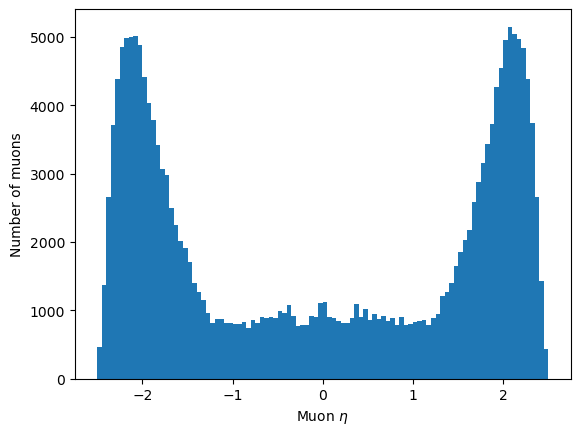

In [19]:
plt.hist(ak.flatten(muon_p4.eta), bins=100, range=(-2.5, 2.5),label="Eta")
#Angle from pi/2 to pi but on both side (pi/2 to 0 too), why it is symmetrical
plt.xlabel('Muon $\eta$')
plt.ylabel("Number of muons")
plt.show() 

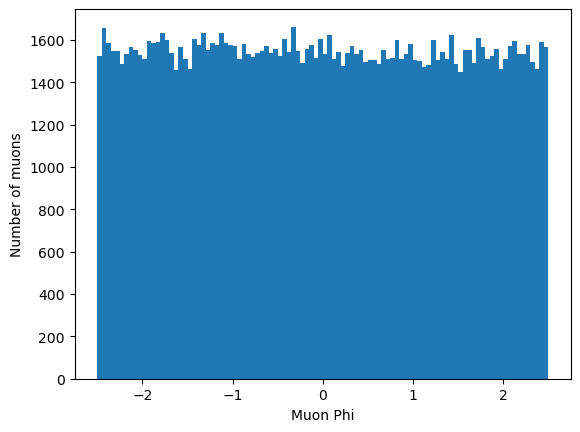

In [20]:
plt.hist(ak.flatten(muon_p4.phi), bins=100, range=(-2.5, 2.5),label="Phi")
plt.xlabel('Muon Phi')
plt.ylabel("Number of muons")
plt.show() #Phi is the angle on plane where it leaves the detector. Gravity doesnt matter so it should all be the same

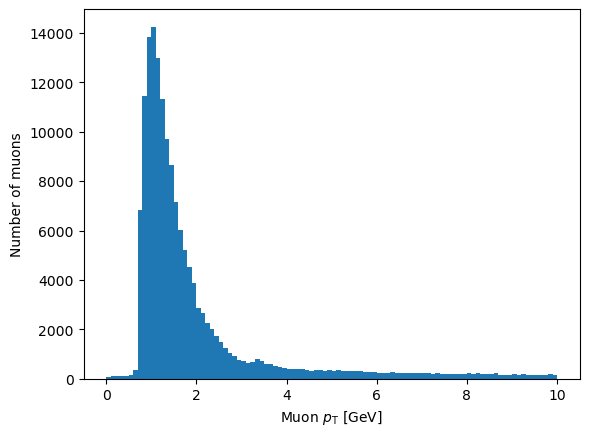

In [21]:
plt.hist(ak.flatten(muon_p4.pt), bins=100, range=(0, 10),label="Pt")
plt.xlabel('Muon $p_{\mathrm{T}}$ [GeV]')
plt.ylabel("Number of muons")
plt.show()

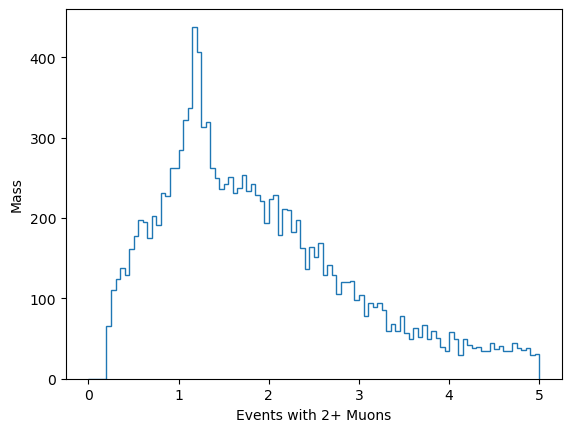

In [28]:
two_muons_mask = branches["muon_n"]>=2 #Mask is applied to limit the input to events with more than 2 muons
two_muons_p4 = muon_p4[two_muons_mask]
first_muon_p4 = two_muons_p4[:, 0]
second_muon_p4 = two_muons_p4[:, 1]
muon_sum_p4 = first_muon_p4 + second_muon_p4
plt.hist((muon_sum_p4.mass),  bins=100, range=(0,5), histtype='step',label="Muon Sum")
#plt.yscale('log')
plt.xlabel("Events with 2+ Muons")
plt.ylabel("Mass")
plt.show()

In [23]:
gen_p4 = vector.zip({"px": branches['gen_p4.fCoordinates.fX'], 
                      "py": branches['gen_p4.fCoordinates.fY'], 
                      "pz": branches['gen_p4.fCoordinates.fZ'], 
                      "t": branches['gen_p4.fCoordinates.fT']})

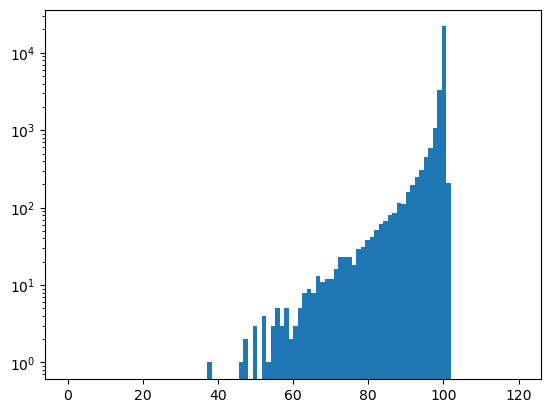

In [24]:
gen_ele_mask=abs(branches["gen_pid"])==11
gen_mu_mask=abs(branches["gen_pid"])==13

ele_p4 = gen_p4[gen_ele_mask]
mu_p4 = gen_p4[gen_mu_mask]

bs_p4 = ele_p4[:,0] + ele_p4[:,1] + mu_p4[:,0] + mu_p4[:,1]

plt.hist((bs_p4.mass), bins=100, range=(0,120))
plt.yscale('log')
plt.show()
#sum of 2 electons = mass of dark photons
#bound state at ~100